In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [2]:
# Loading the dataset
prime_titles_df = pd.read_csv('amazon_prime_titles.csv')

In [3]:
prime_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## Data Cleaning

In [4]:
# Check initial missing values
missing_values = prime_titles_df.isnull().sum()

In [5]:
missing_values

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
# Fill missing 'director', 'cast', 'country' with 'Unknown'
prime_titles_df['director'].fillna('Unknown', inplace=True)
prime_titles_df['cast'].fillna('Unknown', inplace=True)
prime_titles_df['country'].fillna('Unknown', inplace=True)
prime_titles_df['rating'].fillna('NR', inplace=True)

In [7]:
# Fill missing 'date_added' with a placeholder date (January 1, 1900) and convert to datetime
prime_titles_df['date_added'].fillna('1900-01-01', inplace=True)
prime_titles_df['date_added'] = pd.to_datetime(prime_titles_df['date_added'], errors='coerce')

In [8]:
# Check if there are any NaT values after conversion
nat_values_count = prime_titles_df['date_added'].isna().sum()

In [9]:
nat_values_count

9513

In [10]:
# Check the cleaned missing values
cleaned_missing_values = prime_titles_df.isnull().sum()

In [11]:
cleaned_missing_values


show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added      9513
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
prime_titles_df.drop('date_added', axis=1, inplace=True)

In [13]:
prime_titles_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,NR,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2017,NR,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2014,NR,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,NR,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [14]:
# Let's perform a final check to see if the data is clean, by looking at the missing values and the data types.
# We will also look for any anomalies in the data that may need further cleaning.

# Check for missing values
final_missing_values = prime_titles_df.isnull().sum()

# Check data types
final_data_types = prime_titles_df.dtypes

# Check for any unusual or suspicious data points that might indicate dirty data
# For example, check for any unusual entries in the numerical column 'release_year'
unusual_release_years = prime_titles_df['release_year'].sort_values().unique()

final_missing_values, final_data_types, unusual_release_years

(show_id         0
 type            0
 title           0
 director        0
 cast            0
 country         0
 release_year    0
 rating          0
 duration        0
 listed_in       0
 description     0
 dtype: int64,
 show_id         object
 type            object
 title           object
 director        object
 cast            object
 country         object
 release_year     int64
 rating          object
 duration        object
 listed_in       object
 description     object
 dtype: object,
 array([1920, 1922, 1923, 1924, 1925, 1926, 1927, 1929, 1930, 1931, 1932,
        1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
        1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
        1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
        1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
        1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
        1988, 1989, 1990, 1991, 1992, 1993, 1994, 19

# Univariate Analysis

/var/folders/1c/5xztls5d303b4hy__3nvl69r0000gn/T/ipykernel_73496/3662062676.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)


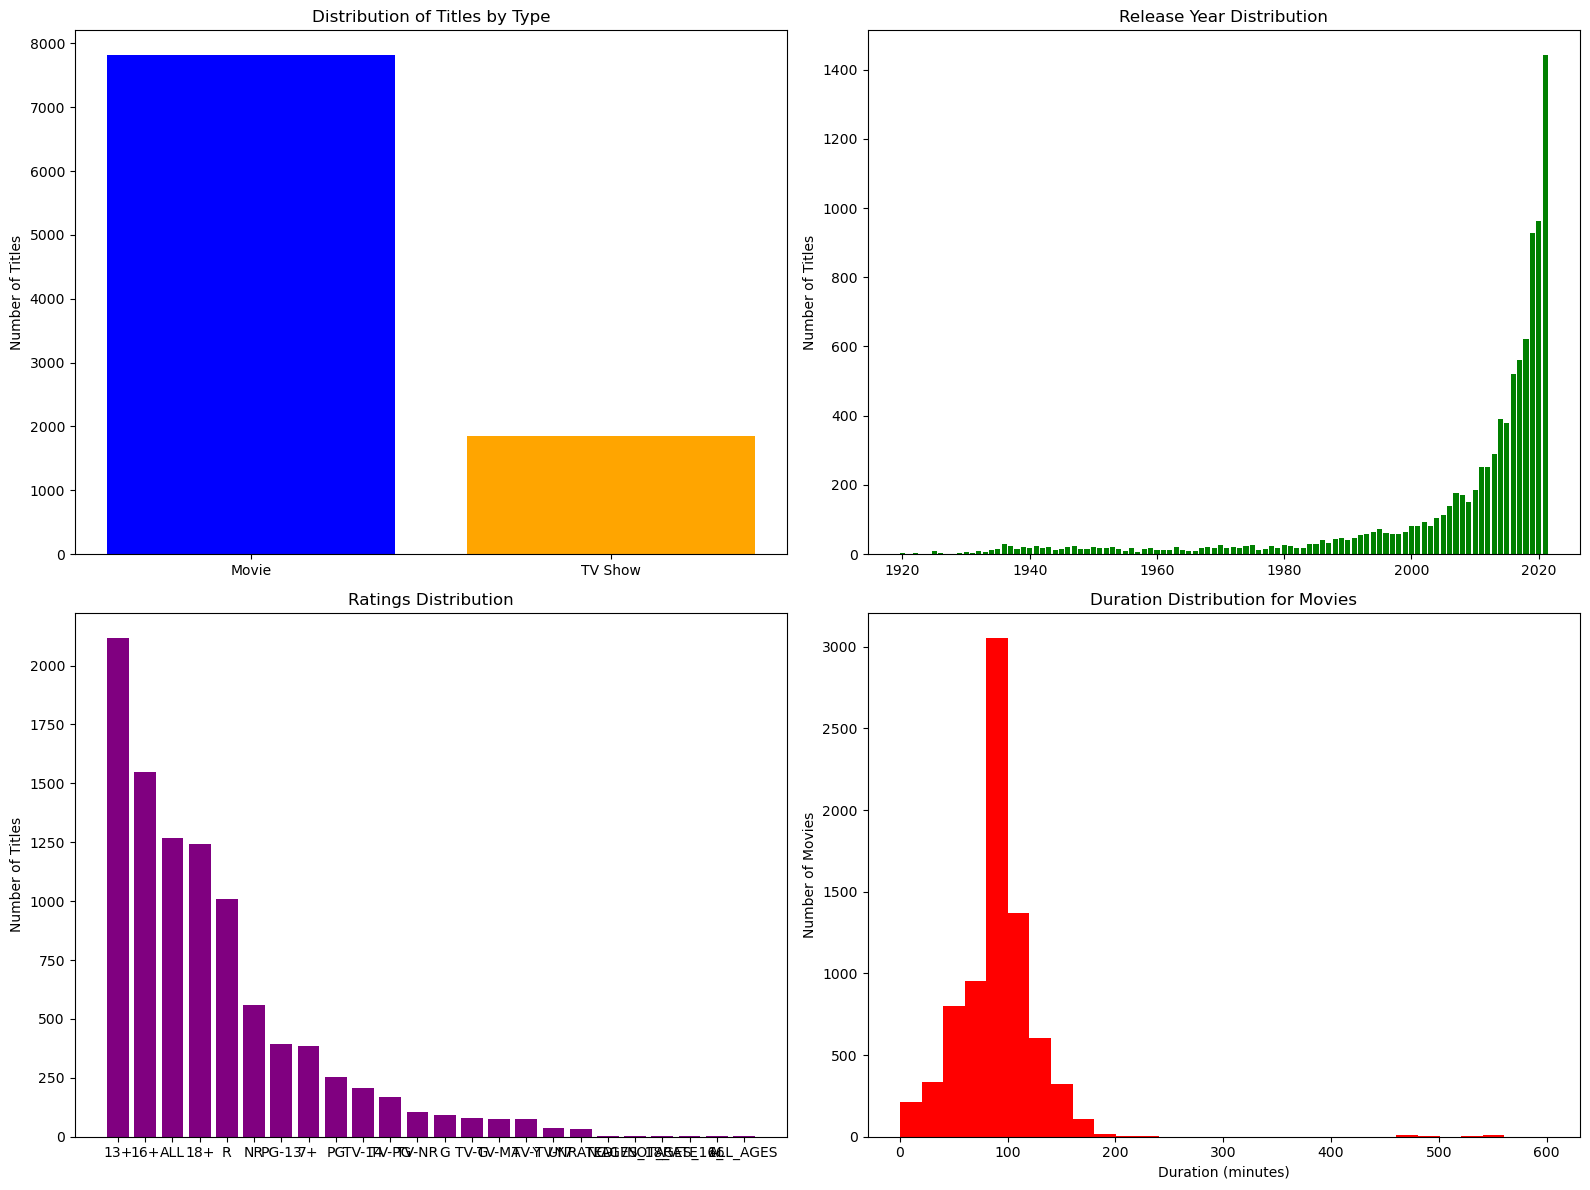

In [15]:
# Univariate Analysis:

# Distribution of Titles by Type
type_counts = prime_titles_df['type'].value_counts()

# Release Year Distribution
release_year_counts = prime_titles_df['release_year'].value_counts().sort_index()

# Ratings Distribution
ratings_counts = prime_titles_df['rating'].value_counts()

# Duration Analysis (For movies only)
# We'll need to convert the duration from string to integer and then analyze the distribution
# But first, we separate the movies from the TV shows as their duration is measured differently
movies_df = prime_titles_df[prime_titles_df['type'] == 'Movie']
# Extract numerical part of duration and convert to integer
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Start plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot for Distribution of Titles by Type
axes[0, 0].bar(type_counts.index, type_counts.values, color=['blue', 'orange'])
axes[0, 0].set_title('Distribution of Titles by Type')
axes[0, 0].set_ylabel('Number of Titles')

# Plot for Release Year Distribution
axes[0, 1].bar(release_year_counts.index, release_year_counts.values, color='green')
axes[0, 1].set_title('Release Year Distribution')
axes[0, 1].set_ylabel('Number of Titles')

# Plot for Ratings Distribution
axes[1, 0].bar(ratings_counts.index, ratings_counts.values, color='purple')
axes[1, 0].set_title('Ratings Distribution')
axes[1, 0].set_ylabel('Number of Titles')

# Plot for Duration Analysis for Movies
axes[1, 1].hist(movies_df['duration'], bins=30, color='red')
axes[1, 1].set_title('Duration Distribution for Movies')
axes[1, 1].set_xlabel('Duration (minutes)')
axes[1, 1].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()

## Explanation for unvariate analysis Visualizations

Distribution of Titles by Type: The bar chart shows the number of movies versus TV shows available in the dataset. This gives a quick visual representation of the proportion of each type.

Release Year Distribution: The distribution is visualized to see which eras are most represented. This can help identify if the content is more modern or if there is a significant number of classic titles.

Ratings Distribution: This bar chart shows the variety of content ratings, which can indicate the target audience demographic that Amazon Prime caters to.

Duration Analysis for Movies: The histogram illustrates the range and distribution of movie durations. This provides insights into the typical length of movies that Amazon Prime offers.

From the plots, we can draw some preliminary conclusions:

There seems to be a higher number of movies than TV shows.

The release years show a range from the early 20th century to the present, with a mix of classic and modern titles.

A variety of ratings are present, indicating a diverse content library suitable for different age groups.

Movie durations vary widely, with a concentration of movies in the typical feature-length duration of around 80-120 minutes.

# Bivariate/Multivariate Analysis

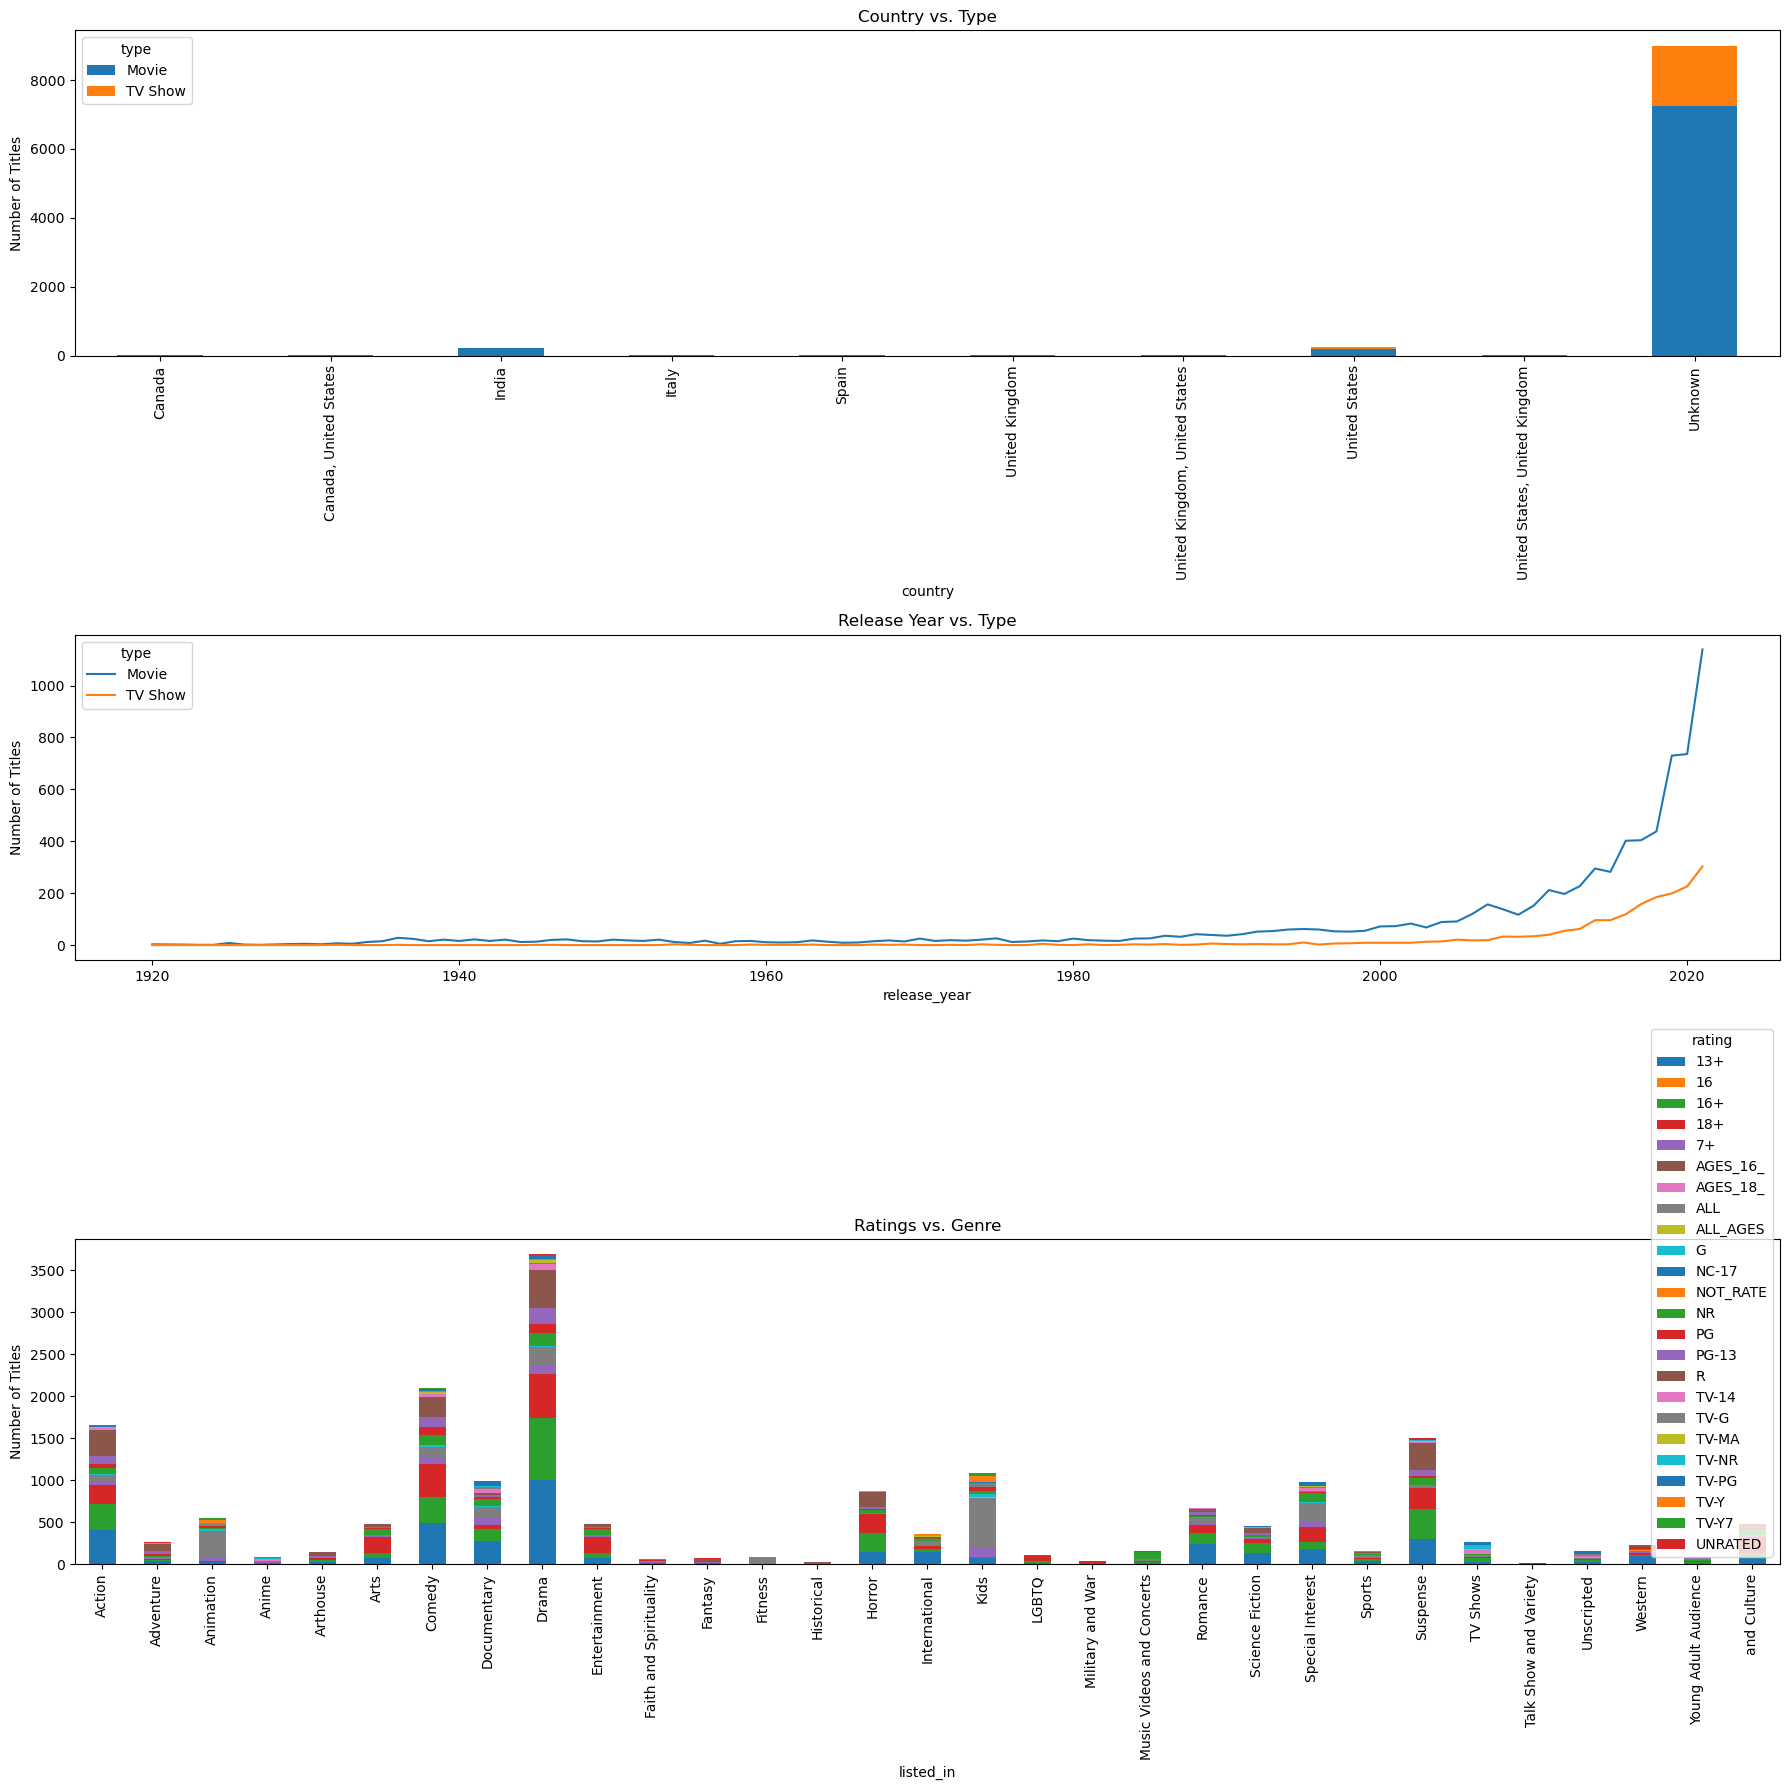

In [16]:
# Bivariate/Multivariate Analysis:

# Country vs. Type
# Due to the large number of countries, we will focus on the top 10 countries by the number of titles
top_countries = prime_titles_df['country'].value_counts().head(10).index
country_type_counts = prime_titles_df[prime_titles_df['country'].isin(top_countries)]
country_type_counts = country_type_counts.groupby('country')['type'].value_counts().unstack().fillna(0)

# Release Year vs. Type
# We will plot the number of movies and TV shows released each year
release_year_type_counts = prime_titles_df.groupby('release_year')['type'].value_counts().unstack().fillna(0)

# Ratings vs. Genre
# We'll need to explode the 'listed_in' column which contains multiple genres separated by commas
prime_titles_df['listed_in'] = prime_titles_df['listed_in'].str.split(', ')
ratings_genre_counts = prime_titles_df.explode('listed_in').groupby('listed_in')['rating'].value_counts().unstack().fillna(0)

# Start plotting
fig, axes = plt.subplots(3, 1, figsize=(18, 18))

# Plot for Country vs. Type
country_type_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Country vs. Type')
axes[0].set_ylabel('Number of Titles')

# Plot for Release Year vs. Type
release_year_type_counts.plot(kind='line', ax=axes[1])
axes[1].set_title('Release Year vs. Type')
axes[1].set_ylabel('Number of Titles')

# Plot for Ratings vs. Genre
ratings_genre_counts.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Ratings vs. Genre')
axes[2].set_ylabel('Number of Titles')

plt.tight_layout()
plt.show()

## Explaining the Visuals of  bivariate/multivariate analysis

The visualizations provide the following insights from the bivariate/multivariate analysis:

Country vs. Type: The bar chart illustrates which countries produce more movies or TV shows. It seems that the 'Unknown' category has the highest count, likely due to missing data. For known countries, the United States has a significant number of both movies and TV shows, with movies being the predominant type of content.

Release Year vs. Type: The line chart displays the trend in the type of content being released over the years. There is a clear increase in the number of movies over time, with a particularly sharp rise in recent years. The number of TV shows also increases but remains much lower than movies.

Ratings vs. Genre: The stacked bar chart explores if certain ratings are more common in specific genres. This visualization shows the spread of ratings across different genres, indicating that some genres, like Action and Drama, have a wide range of content ratings, while others, such as Documentaries, tend to have more content rated as suitable for all ages.

In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Text Analysis

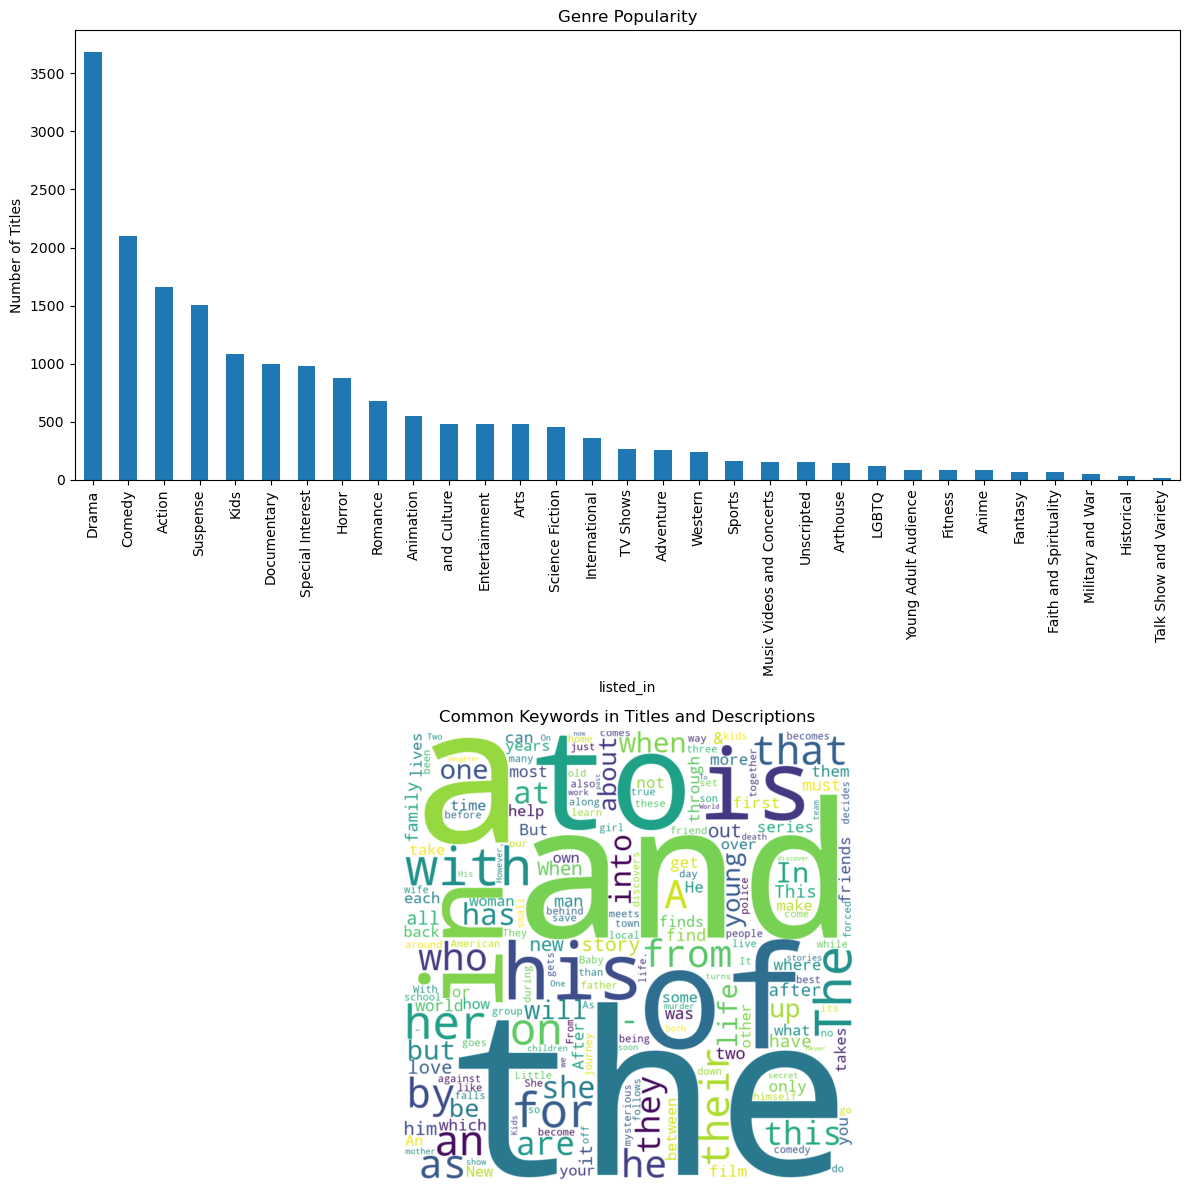

In [18]:
from collections import Counter
from wordcloud import WordCloud

# Text Analysis:

# Genre Popularity
# We'll use the 'listed_in' column which has already been exploded in the previous analysis
genre_popularity = prime_titles_df.explode('listed_in')['listed_in'].value_counts()

# Keyword Extraction from Titles and Descriptions
# We will combine the titles and descriptions into a single text and extract common keywords
combined_text = prime_titles_df['title'] + " " + prime_titles_df['description']
combined_text = " ".join(combined_text)

# We can use a simple method to extract keywords by splitting the text and counting word occurrences
# Note: This is a very basic approach and more sophisticated methods can be used for in-depth text analysis
words = combined_text.split()
word_counts = Counter(words)

# Create a word cloud for a visual representation of common keywords
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(word_counts)

# Start plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot for Genre Popularity
genre_popularity.plot(kind='bar', ax=axes[0])
axes[0].set_title('Genre Popularity')
axes[0].set_ylabel('Number of Titles')

# Plot for Word Cloud
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Common Keywords in Titles and Descriptions')

plt.tight_layout()
plt.show()


# Explanation for Text Analysis Visuals


The analysis provides insights into the genres and common themes within the Amazon Prime titles dataset:

Genre Popularity: The bar chart displays the popularity of different genres. It indicates which genres are most common in the dataset. This information can be useful for understanding audience preferences and content strategies.

Common Keywords in Titles and Descriptions: The word cloud visually represents the most common keywords found in the titles and descriptions of the titles. Larger words in the word cloud represent more frequently occurring keywords. This can help identify prevalent themes or topics in the content library.

# Correlation Analysis

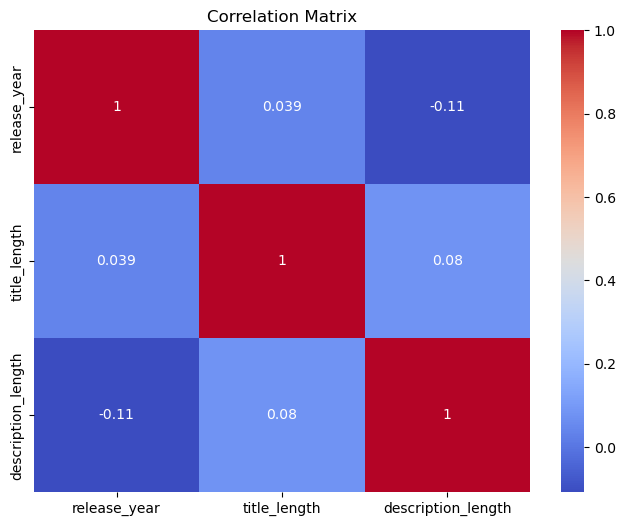

In [19]:
# Correlation Analysis:

# For this analysis, we will create two new columns:
# 1. Length of the title
# 2. Length of the description
prime_titles_df['title_length'] = prime_titles_df['title'].apply(len)
prime_titles_df['description_length'] = prime_titles_df['description'].apply(len)

# We will explore the correlation between these new columns and the 'release_year'
correlation_data = prime_titles_df[['release_year', 'title_length', 'description_length']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Explanation for Correlation Visualization 

The heatmap displays the correlation matrix for the numerical variables: release_year, title_length, and description_length. Here are the key insights:

The correlation between release_year and title_length is relatively low. This suggests that there isn't a strong relationship between the year a title was released and the length of its title.
The correlation between release_year and description_length is also quite low, indicating that the length of the description is not significantly influenced by the year of release.
The correlation between title_length and description_length is modest. While there is some correlation, it's not strong enough to suggest a significant relationship.
In summary, these correlations indicate that the release year of the content does not have a strong influence on the complexity or detail of the title or description, as measured by their lengths. This could suggest that the style of titling and description writing has remained relatively consistent over the years, or that any changes in style are not directly related to the release year.

# Other Visualizations

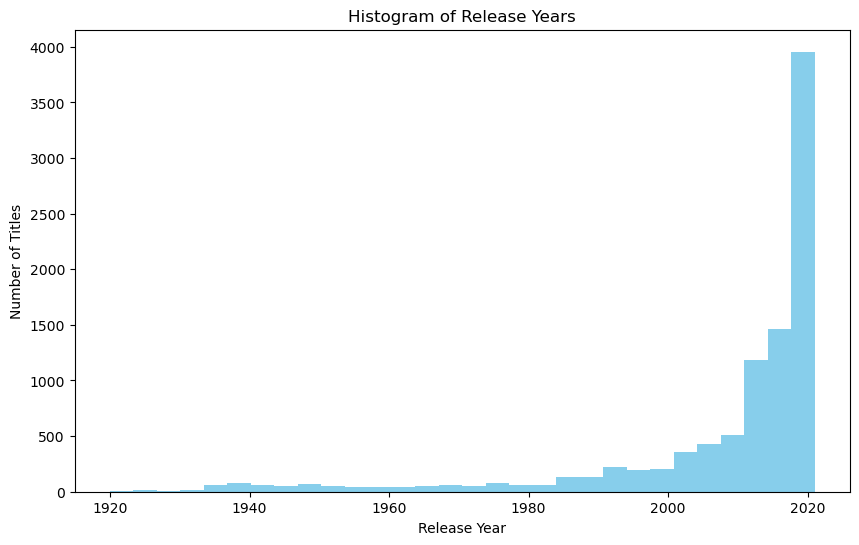

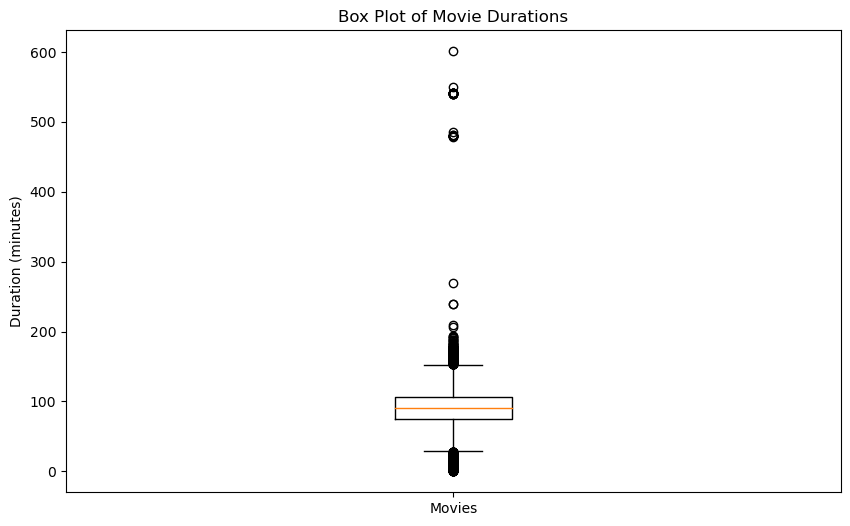

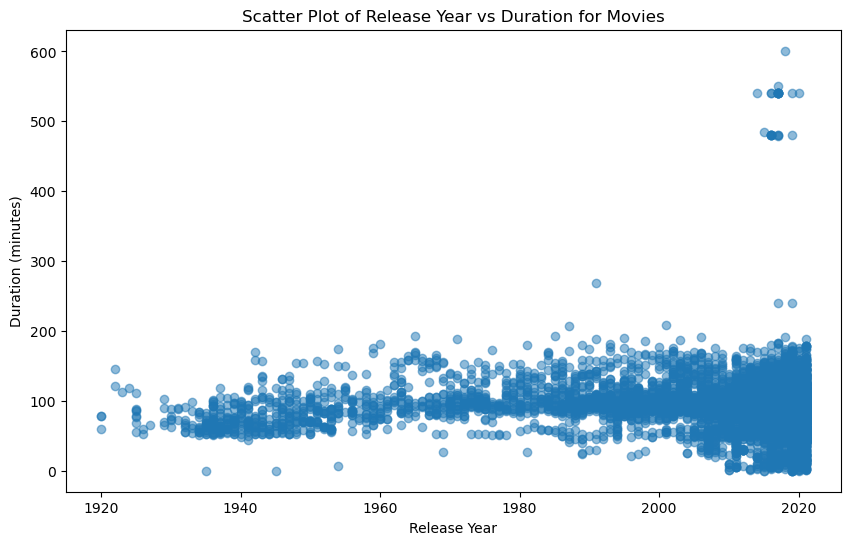

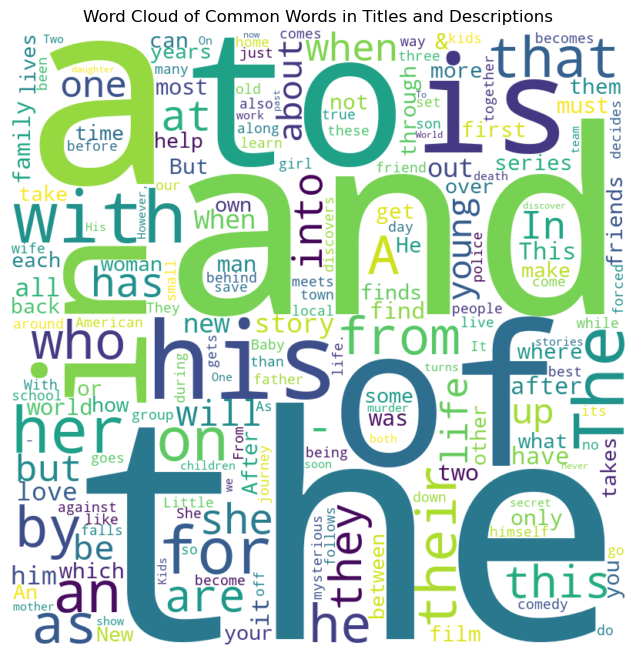

In [20]:
# Visualization:

# For visualization, we will create:
# 1. A histogram for the release years
# 2. A box plot for the duration of movies
# 3. A scatter plot to visualize the relationship between release year and duration for movies
# 4. A word cloud for common words in titles and descriptions (already created, but will be displayed again)

# 1. Histogram for Release Years
plt.figure(figsize=(10, 6))
plt.hist(prime_titles_df['release_year'], bins=30, color='skyblue')
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

# 2. Box Plot for Duration of Movies
plt.figure(figsize=(10, 6))
plt.boxplot(movies_df['duration'])
plt.title('Box Plot of Movie Durations')
plt.ylabel('Duration (minutes)')
plt.xticks([1], ['Movies'])
plt.show()

# 3. Scatter Plot for Release Year vs Duration for Movies
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['release_year'], movies_df['duration'], alpha=0.5)
plt.title('Scatter Plot of Release Year vs Duration for Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

# 4. Word Cloud for Common Words in Titles and Descriptions (Displayed Again)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Titles and Descriptions')
plt.show()


## Explanations for Visuals

These visualizations are created to better understand the data:

Histogram of Release Years: This histogram shows the distribution of release years for titles. It provides a visual representation of how many titles were released in different years, helping identify trends or dominant periods.

Box Plot of Movie Durations: The box plot gives an overview of the distribution of movie durations, including the median, quartiles, and any potential outliers. This helps understand the typical length of movies and the variability in duration.

Scatter Plot of Release Year vs Duration for Movies: This scatter plot visualizes the relationship between the release year of movies and their duration. It can help identify if there are any trends over time in the length of movies.

Word Cloud of Common Words in Titles and Descriptions: The word cloud (displayed again) illustrates the most common words found in the titles and descriptions of the titles. This visualization helps in quickly identifying key themes or subjects present in the content.

